In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import torch

## 基础运算

In [10]:
tensor1 = torch.ones(3, 3)
tensor2 = torch.tensor([[1., 2.], [3., 4.], [5., 6.]])

In [3]:
tensor1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [11]:
tensor2

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [13]:
tensor2.mean(0)

tensor([3., 4.])

In [15]:
torch.matmul(tensor1, tensor2)

tensor([[ 9., 12.],
        [ 9., 12.],
        [ 9., 12.]])

## 计算梯度

In [6]:
from torch.autograd import Variable
array = [2., 4.]
x_tensor = torch.tensor(array)
x = Variable(x_tensor, requires_grad=True)
y = x**2
o = sum(y)
o.backward()
x.grad

tensor([4., 8.])

## 线性回归小李子

epoch 0, loss 29.40323257446289
epoch 50, loss 6.367362976074219
epoch 100, loss 4.3026933670043945
epoch 150, loss 2.90751051902771
epoch 200, loss 1.9647252559661865
epoch 250, loss 1.327647089958191
epoch 300, loss 0.8971466422080994
epoch 350, loss 0.6062396764755249
epoch 400, loss 0.40966179966926575
epoch 450, loss 0.2768259644508362
epoch 500, loss 0.1870630830526352
epoch 550, loss 0.12640616297721863
epoch 600, loss 0.0854177474975586
epoch 650, loss 0.0577203668653965
epoch 700, loss 0.03900397941470146
epoch 750, loss 0.026356568560004234
epoch 800, loss 0.017810236662626266
epoch 850, loss 0.012035256251692772
epoch 900, loss 0.008132838644087315
epoch 950, loss 0.00549556827172637
epoch 1000, loss 0.0037134794984012842


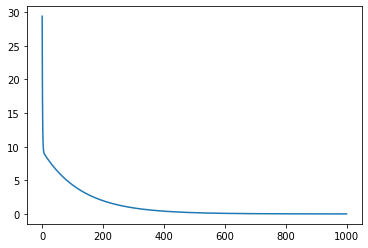

In [18]:
from pickletools import optimize
from turtle import forward
import torch.nn as nn

prices = np.array([3, 4, 5, 6, 7, 8, 9], dtype=np.float32).reshape(-1,1)
tprices = Variable(torch.from_numpy(prices))
sales = np.array([7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5], dtype=np.float32).reshape(-1,1)
tsales = Variable(torch.from_numpy(sales))

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size) -> None:
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    optimizer.zero_grad()
    results = model(tprices)
    loss = mse(results, tsales)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if (iteration%50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number), loss_list)
plt.show()

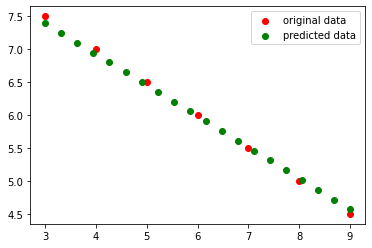

In [22]:
pdatax = Variable(torch.from_numpy(np.linspace(3, 9, 20, dtype=np.float32).reshape(-1, 1)))
predicted = model(pdatax).data.numpy()
plt.scatter(prices, sales, label='original data', c='red')
plt.scatter(np.linspace(3, 9, 20), predicted, label='predicted data', c='green')
plt.legend()
plt.show()

## 逻辑回归小李子

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

train = pd.read_csv('', dtype=np.float32)

y = train.label.values
x = train.loc[:, train.columns!='label'].values/255
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_tensor = torch.from_numpy(x_train)
y_train_tensor = torch.from_numpy(y_train)

x_test_tensor = torch.from_numpy(x_test).type(torch.LongTensor)
y_test_tensor = torch.from_numpy(y_test).type(torch.LongTensor)

batch_size = 100
n_iters = 1000
num_epochs = int(n_iters / (len(x_train) / batch_size))

train_data = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
test_data = torch.utils.data.TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

class LogisticRegressionModel(nn.module):
    def __init__(self, input_dim, output_idm) -> None:
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 28*28
output_dim = 10
model = LogisticRegressionModel(input_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()

        count += 1
        if count%50 == 0:
            corret = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                corret += (predicted == labels).sum()
            accuracy = corret / float(total)
        if count%500 == 0:
            print('Iteration :{}  Loss: {}  Accuracy: {:.2%}'.format(count, loss.data, accuracy))



## Create ANN Model

In [ ]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()

        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10
# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Create CNN Model

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(x_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(x_train_tensor,y_train_tensor)
test = torch.utils.data.TensorDataset(x_test_tensor,y_train_tensor)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Create RNN Model

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

## Create LSTM Model

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # LSTM
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True) # batch_first=True (batch_dim, seq_dim, feature_dim)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # 28 time steps
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out
    
input_dim = 28
hidden_dim = 100
layer_dim = 1
output_dim = 10
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

## Create GNN Model

In [ ]:
class Discriminator(nn.Module):
    def __init__(self) -> None:
        super(Discriminator).__init__()

        self.label_emb = nn.Embedding(10, 10)

        self.model = nn.Sequential(
            nn.Linear(794, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()

        )

    def forward(self, x, labels):
        x = x.view(x.size(0), 784)
        c = self.label_emb(labels)
        x = torch.cat([x, c], 1)
        out = self.model(x)
        return out.squeeze()


class Generator(nn.Module):
    def __init__(self) -> None:
        super(Generator).__init__()

        self.label_emb = nn.Embedding(10, 10)

        self.model = nn.Sequential(
            nn.Linear(110, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()

        )

    def forward(self, z, labels):
        z = z.view(z.size(0), 100)
        c = self.label_emb(labels)
        z = torch.cat([z, c], 1)
        out = self.model(z)
        return out.view(z.size(0), 28, 28)

In [ ]:
discriminator = Discriminator()
generator = Generator()
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=learning_rate)

def generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion):
    g_optimizer.zero_grad()
    z = Variable(torch.randn(batch_size, 100))
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size)))
    fake_images = generator(z, fake_labels)

    validity = discriminator(fake_images, fake_labels)
    g_loss = criterion(validity, Variable(torch.ones(batch_size)))
    g_loss.backward()
    g_optimizer.step()
    return g_loss.data[0]

def discriminator_train_step(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):
    d_optimizer.zero_grad()

    # train with real images
    real_validity = discriminator(real_images, labels)
    real_loss = criterion(real_validity, Variable(torch.ones(batch_size)))
    
    # train with fake images
    z = Variable(torch.randn(batch_size, 100))
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size)))
    fake_images = generator(z, fake_labels)
    fake_validity = discriminator(fake_images, fake_labels)
    fake_loss = criterion(fake_validity, Variable(torch.zeros(batch_size)))
    
    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss.data[0]

In [ ]:
from torchvision.utils import make_grid
num_epochs = 30
n_critic = 5
display_step = 300
for epoch in range(num_epochs):
    print('Starting epoch {}...'.format(epoch))
    for i, (images, labels) in enumerate(train_loader):
        real_images = Variable(images).cuda()
        labels = Variable(labels).cuda()
        generator.train()
        batch_size = real_images.size(0)
        d_loss = discriminator_train_step(len(real_images), discriminator,
                                          generator, d_optimizer, criterion,
                                          real_images, labels)
        g_loss = generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion)

    generator.eval()
    print('g_loss: {}, d_loss: {}'.format(g_loss, d_loss))
    z = Variable(torch.randn(9, 100)).cuda()
    labels = Variable(torch.LongTensor(np.arange(9))).cuda()
    sample_images = generator(z, labels).unsqueeze(1).data.cpu()
    grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()

## Create GAN Model

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [8]:
np.vstack([np.linspace(-1,1,5) for _ in range(3)]).shape

(3, 5)

In [9]:
np.random.uniform(1,2,size=3)[:,np.newaxis].shape

(3, 1)

In [2]:
torch.manual_seed(1)
np.random.seed(1)

learning_rate_g = 0.001
learning_rate_d = 0.001
batch_size = 64
g_input = 5
g_output = 15
 

PAINT_POINTS = np.vstack([np.linspace(-1,1,g_output) for _ in range(batch_size)])
def artist_work():
    a=np.random.uniform(1,2,size=batch_size)[:,np.newaxis]
    paints = a * np.power(PAINT_POINTS,2) + (a-1)
    paints = torch.from_numpy(paints).float()
    return paints

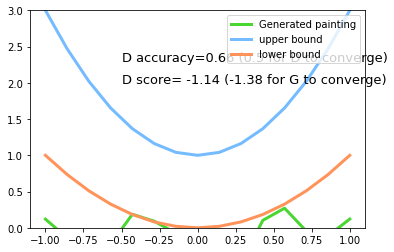

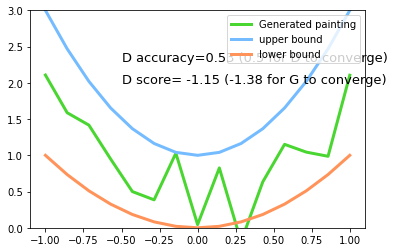

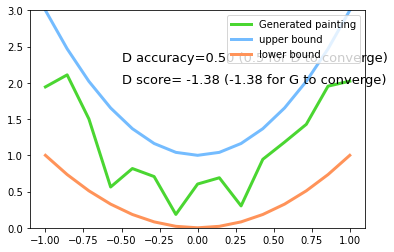

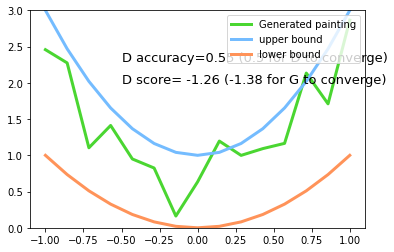

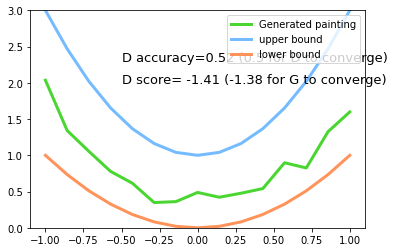

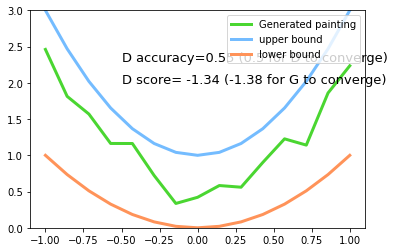

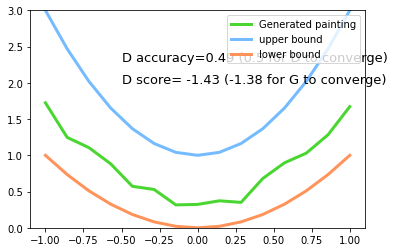

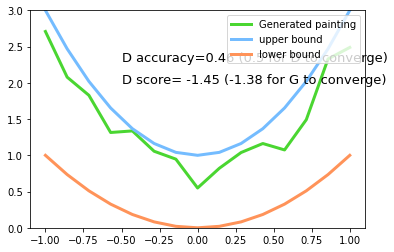

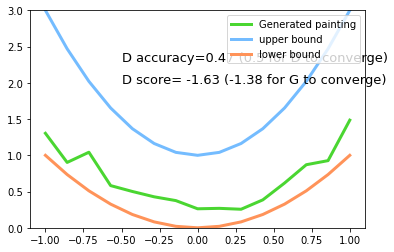

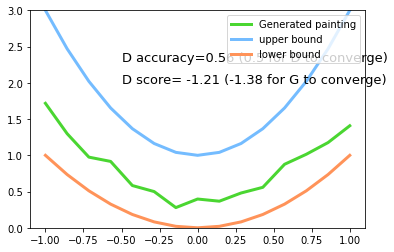

In [6]:
G = nn.Sequential(
    nn.Linear(g_input, 128),
    nn.ReLU(),
    nn.Linear(128, g_output),
)
D = nn.Sequential(
    nn.Linear(g_output, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)


optimizer_G = torch.optim.Adam(G.parameters(), lr=learning_rate_g)
optimizer_D = torch.optim.Adam(D.parameters(), lr=learning_rate_d)

for step in range(10000):
    artist_painting = artist_work()

    G_idea = torch.randn(batch_size, g_input)
    G_paintings = G(G_idea)

    pro_0 = D(G_paintings)
    pro_1 = D(artist_painting)
    
    G_loss = -1/torch.mean(torch.log(1.-pro_0))
    Criterion = torch.nn.BCELoss()
    D_loss = Criterion(pro_1, torch.ones_like(pro_1))+Criterion(pro_0, torch.zeros_like(pro_0))
    # D_loss = -torch.mean(torch.log(pro_1)+torch.log(1.-pro_0))

    optimizer_G.zero_grad()
    G_loss.backward(retain_graph=True)

    optimizer_D.zero_grad()
    D_loss.backward()

    optimizer_G.step()
    optimizer_D.step()

    if step%1000 ==0:
        plt.cla()
        plt.Figure(figsize=(8,8))
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % pro_1.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.1)
        plt.show

## 未完待续